# Interpolation Benchmarking
### Data Setting:
* 6 subjects, 4 trials each.
  * Each trial is 128 channels by ~150,000 timesteps, sampled at 500 Hz (so, around 6 minutes per scan)
* The discriminibility label used is the subject ID.

In [1]:
import pickle as pkl
import numpy as np
from auto_bench.results import (bench_report,
                                compare_results,
                                crossval_plot)
from auto_bench.main import metric_test, best_param_combo

In [2]:
exp_dir = 'int_35/'
with open('results/' + exp_dir + 'interpolate_10_param_map.pkl', 'r') as f:
    pmap_i35 = pkl.load(f)
with open('results/' + exp_dir + 'interpolate_10.pkl', 'r') as f:
    R_i35 = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    results_i35 = pkl.load(f)
    
exp_dir = 'def_35/'
with open('results/' + exp_dir + 'interpolate_10_param_map.pkl', 'r') as f:
    pmap_d35 = pkl.load(f)
with open('results/' + exp_dir + 'interpolate_10.pkl', 'r') as f:
    R_d35 = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    results_d35 = pkl.load(f)

exp_dir = 'no_denoise_full/'
with open('results/' + exp_dir + 'default_no_denoise_param_map.pkl', 'r') as f:
    pmap_no = pkl.load(f)
with open('results/' + exp_dir + 'default_no_denoise.pkl', 'r') as f:
    R_no = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    results_no = pkl.load(f)

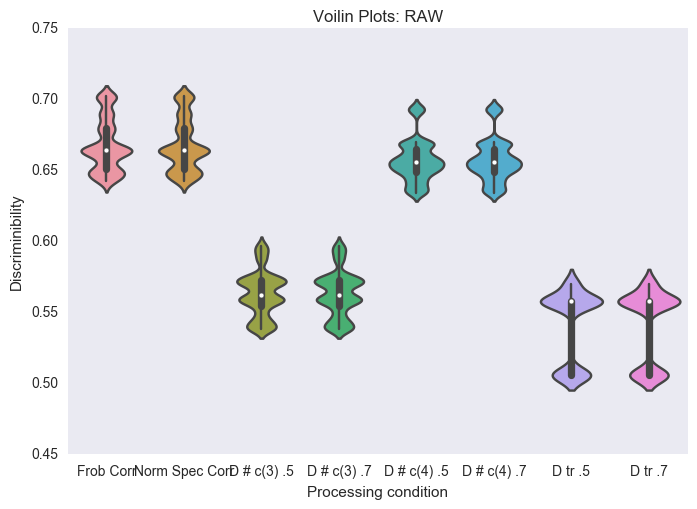

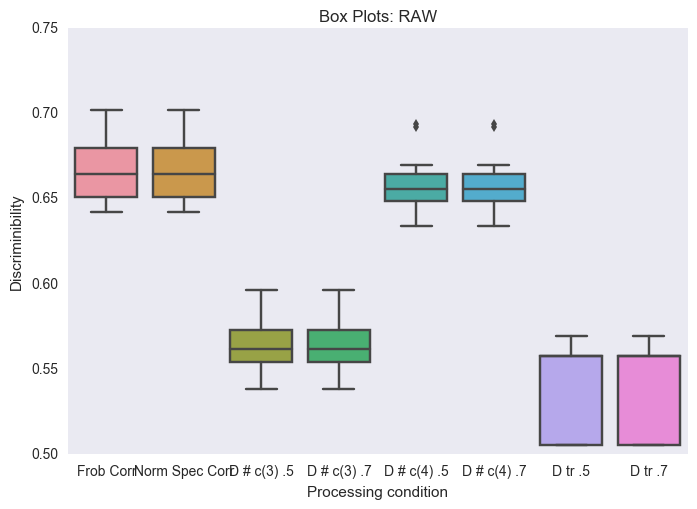

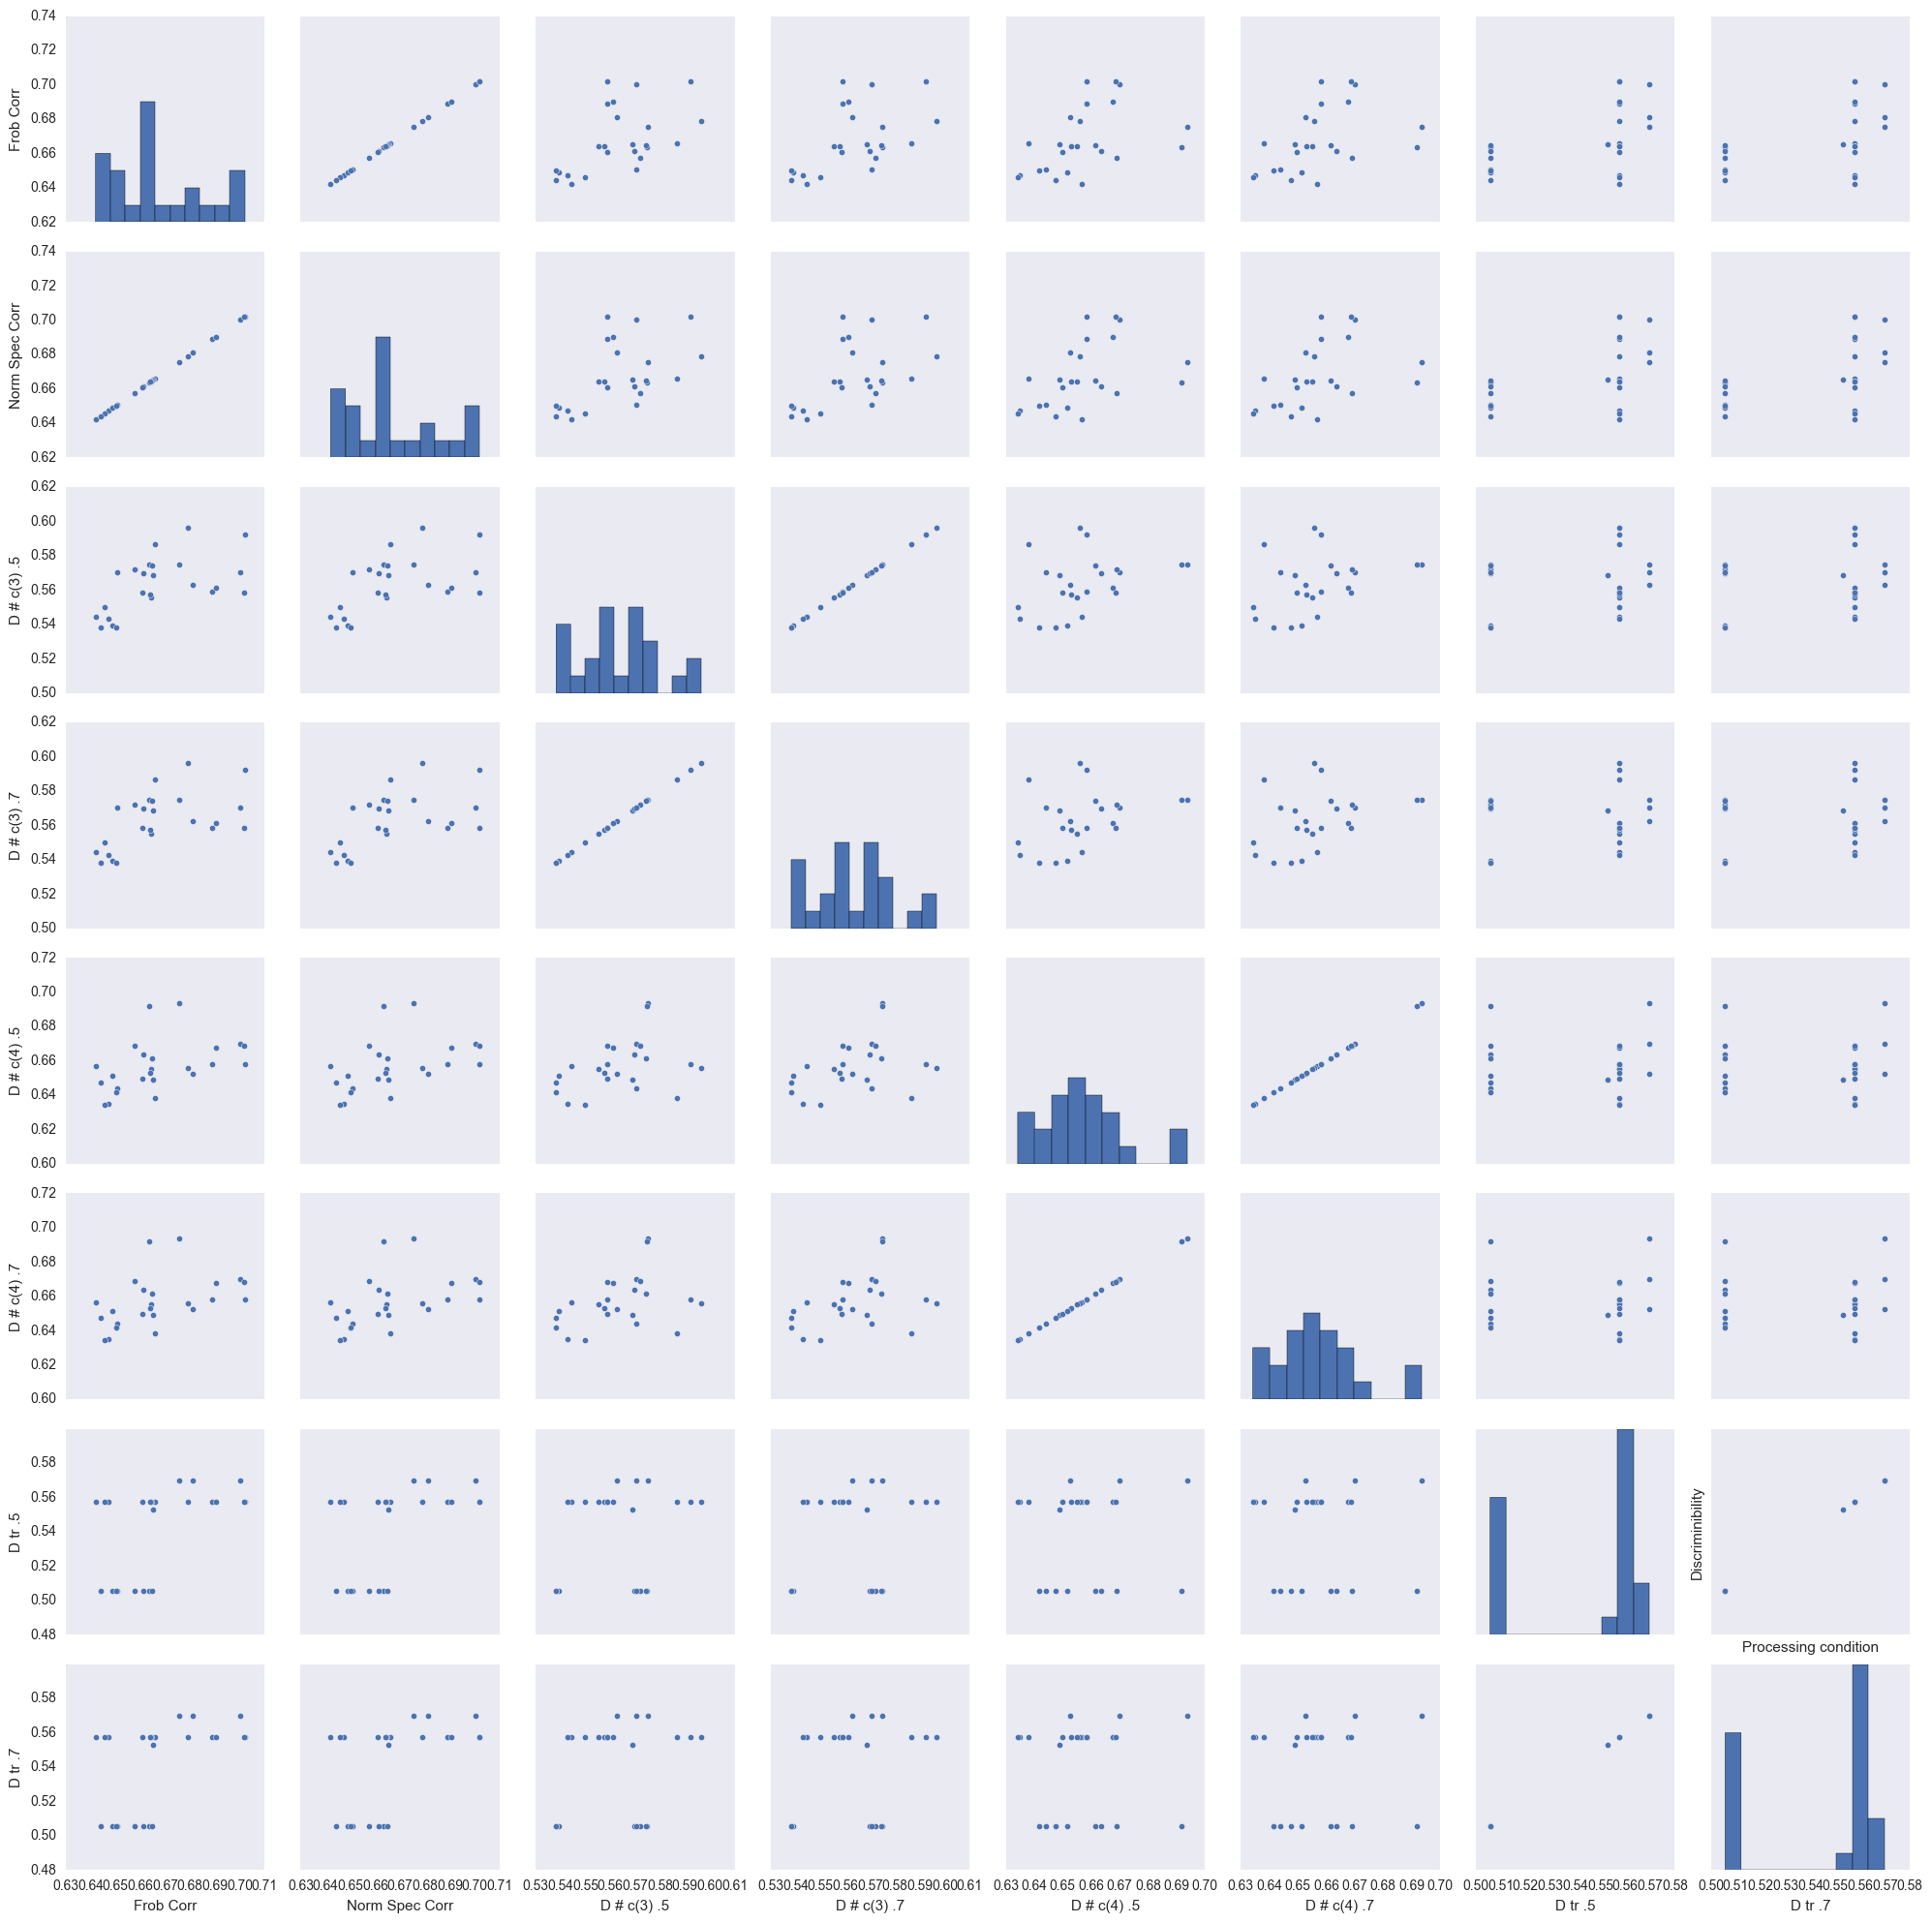

In [12]:
compare_results(results_no[0],
                'RAW')

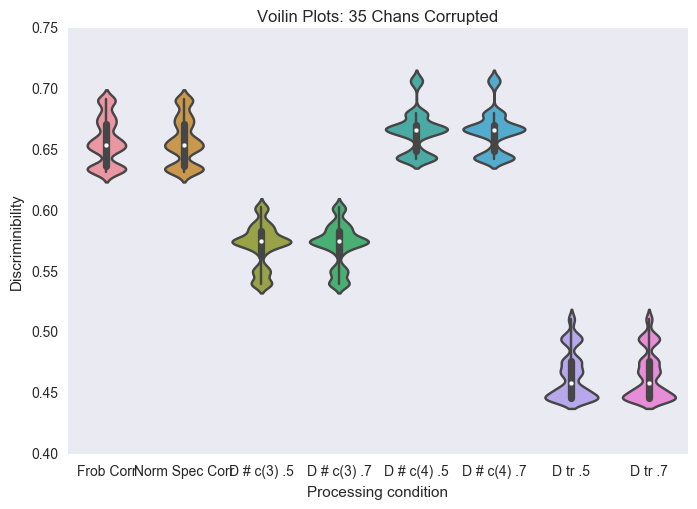

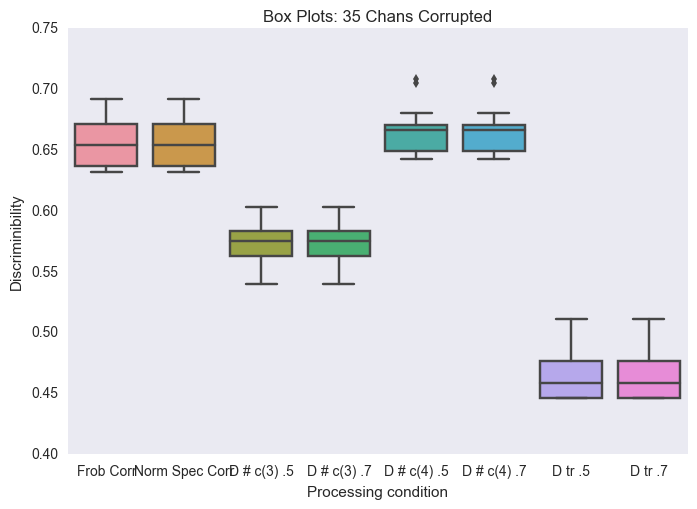

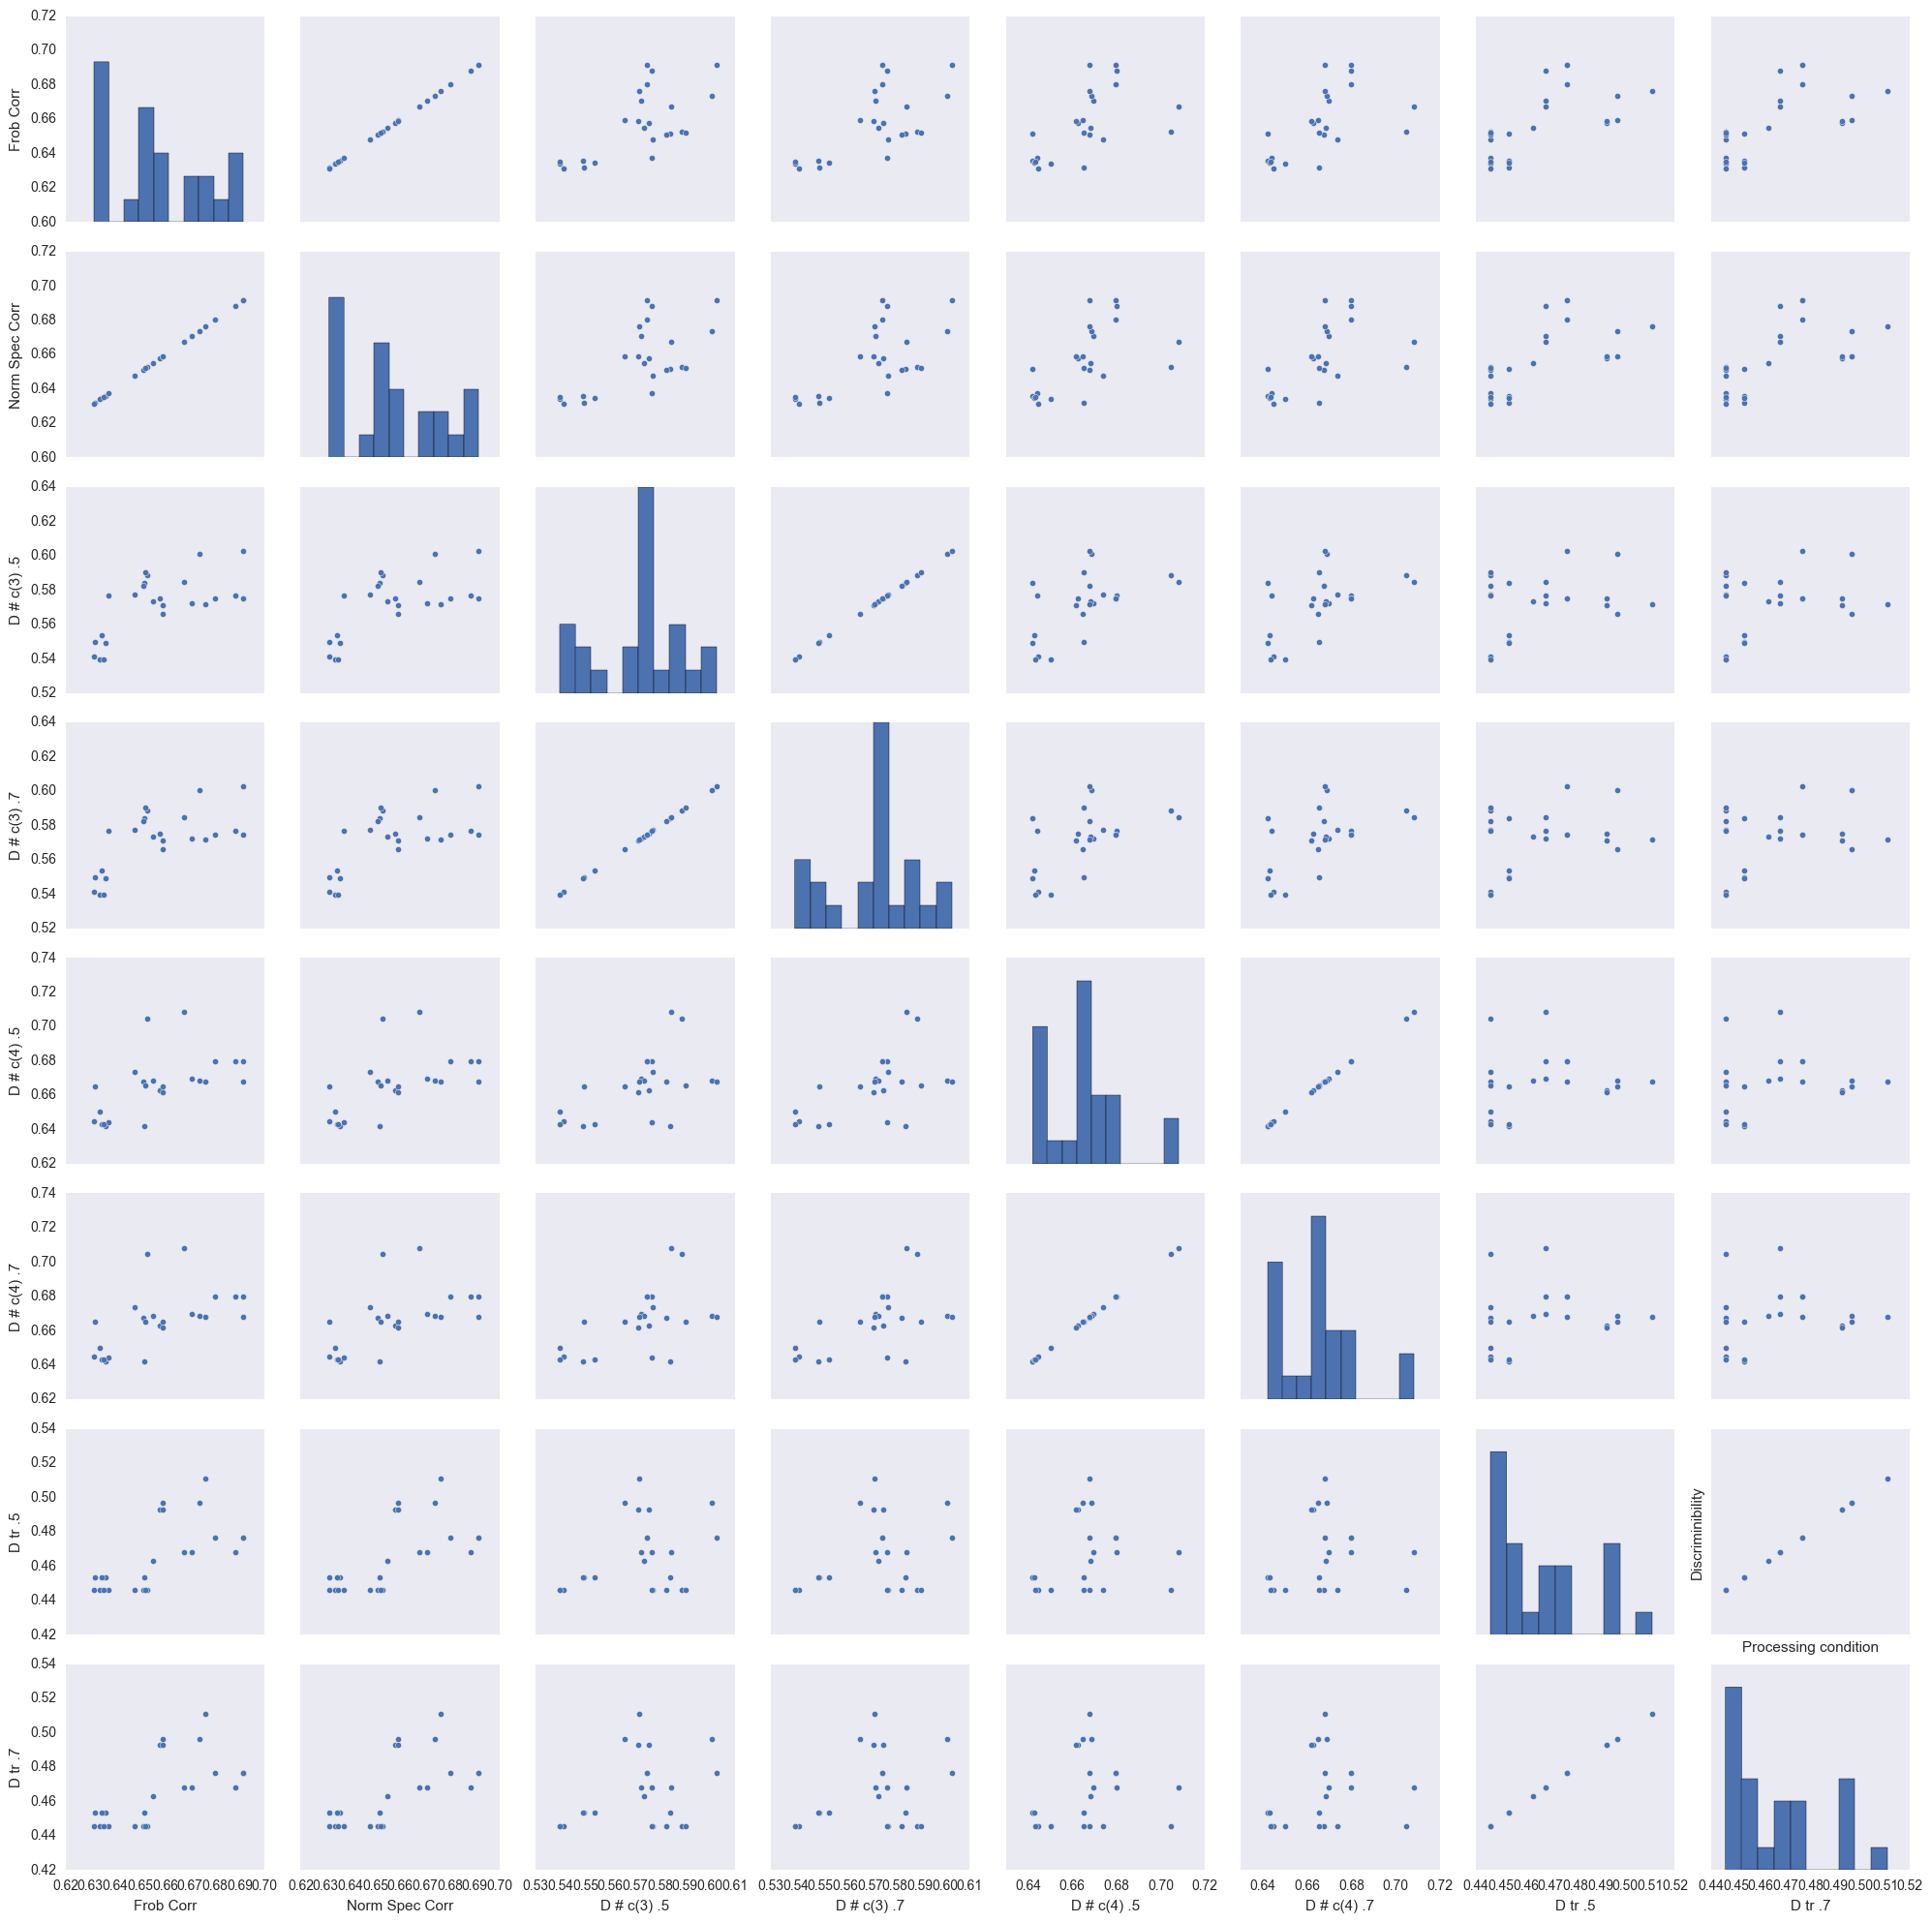

In [4]:
compare_results(results_d35[0],
                '35 Chans Corrupted')

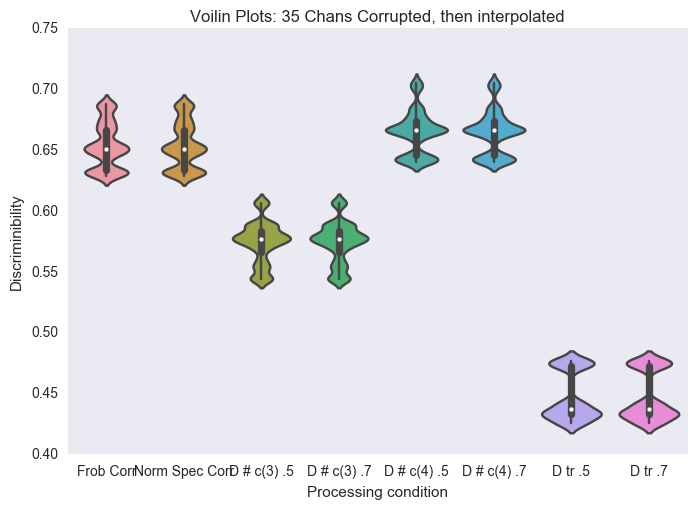

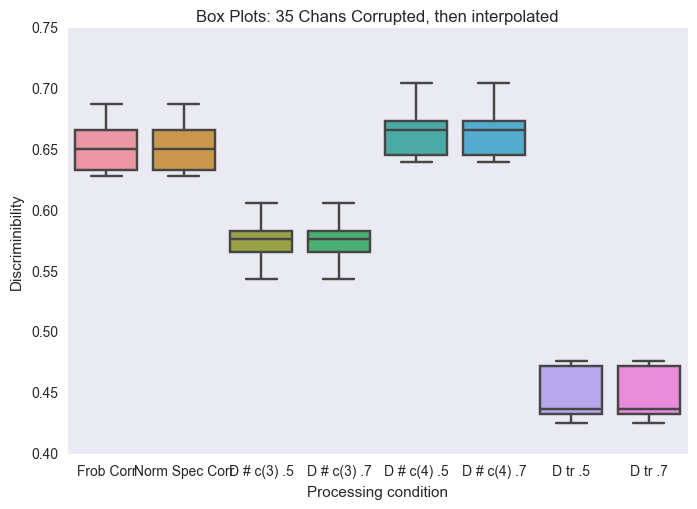

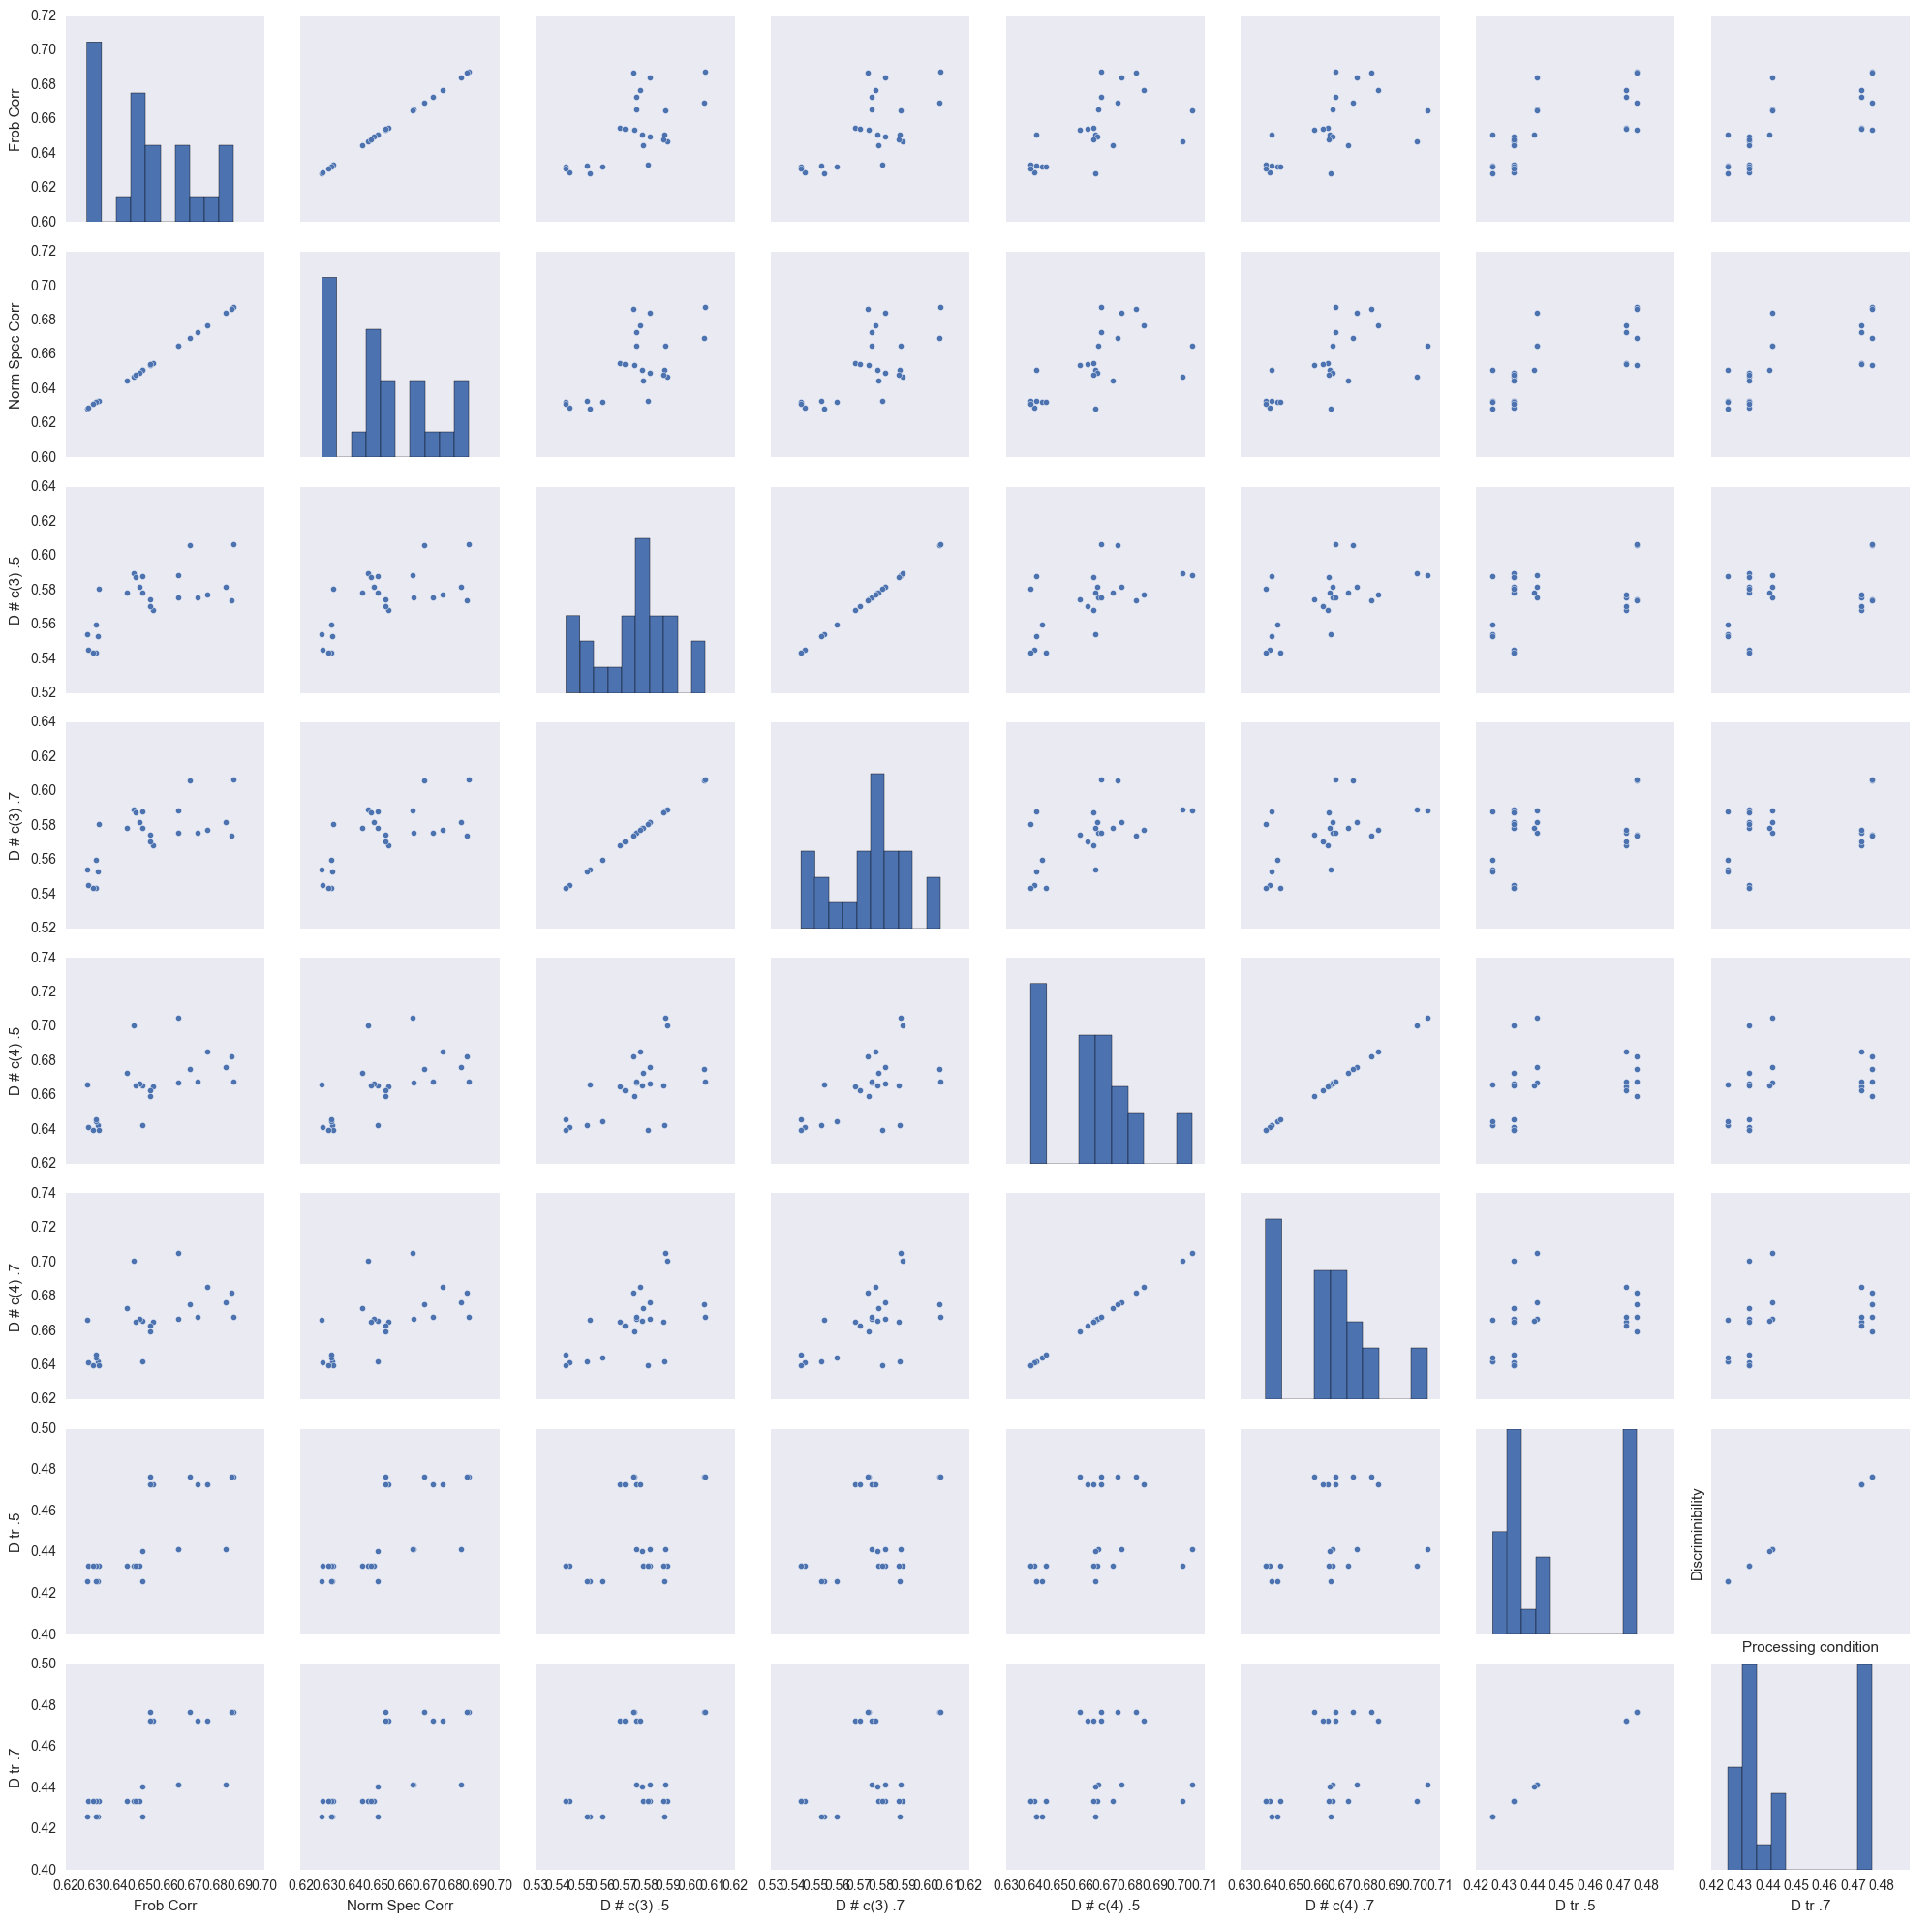

In [5]:
compare_results(results_i35[0],
                '35 Chans Corrupted, then interpolated')

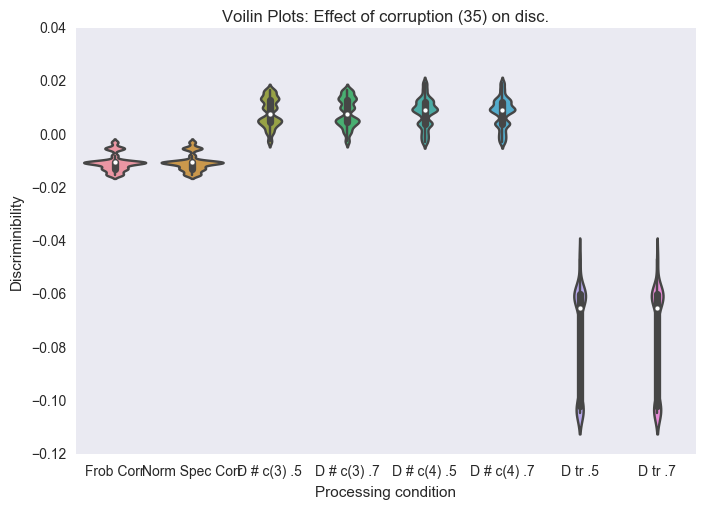

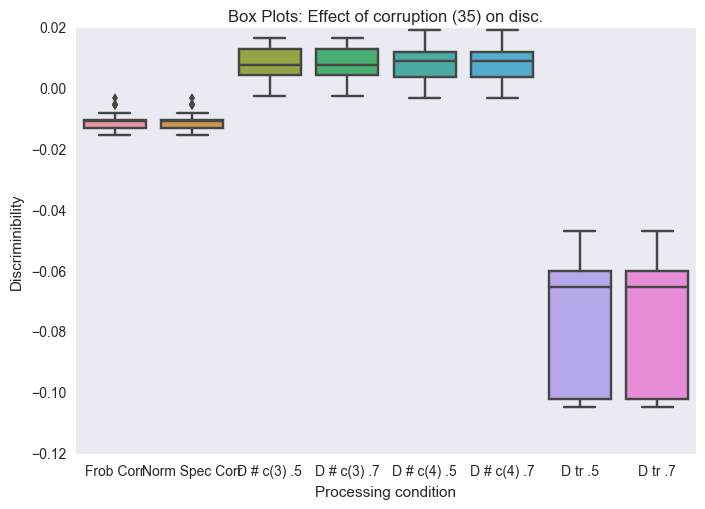

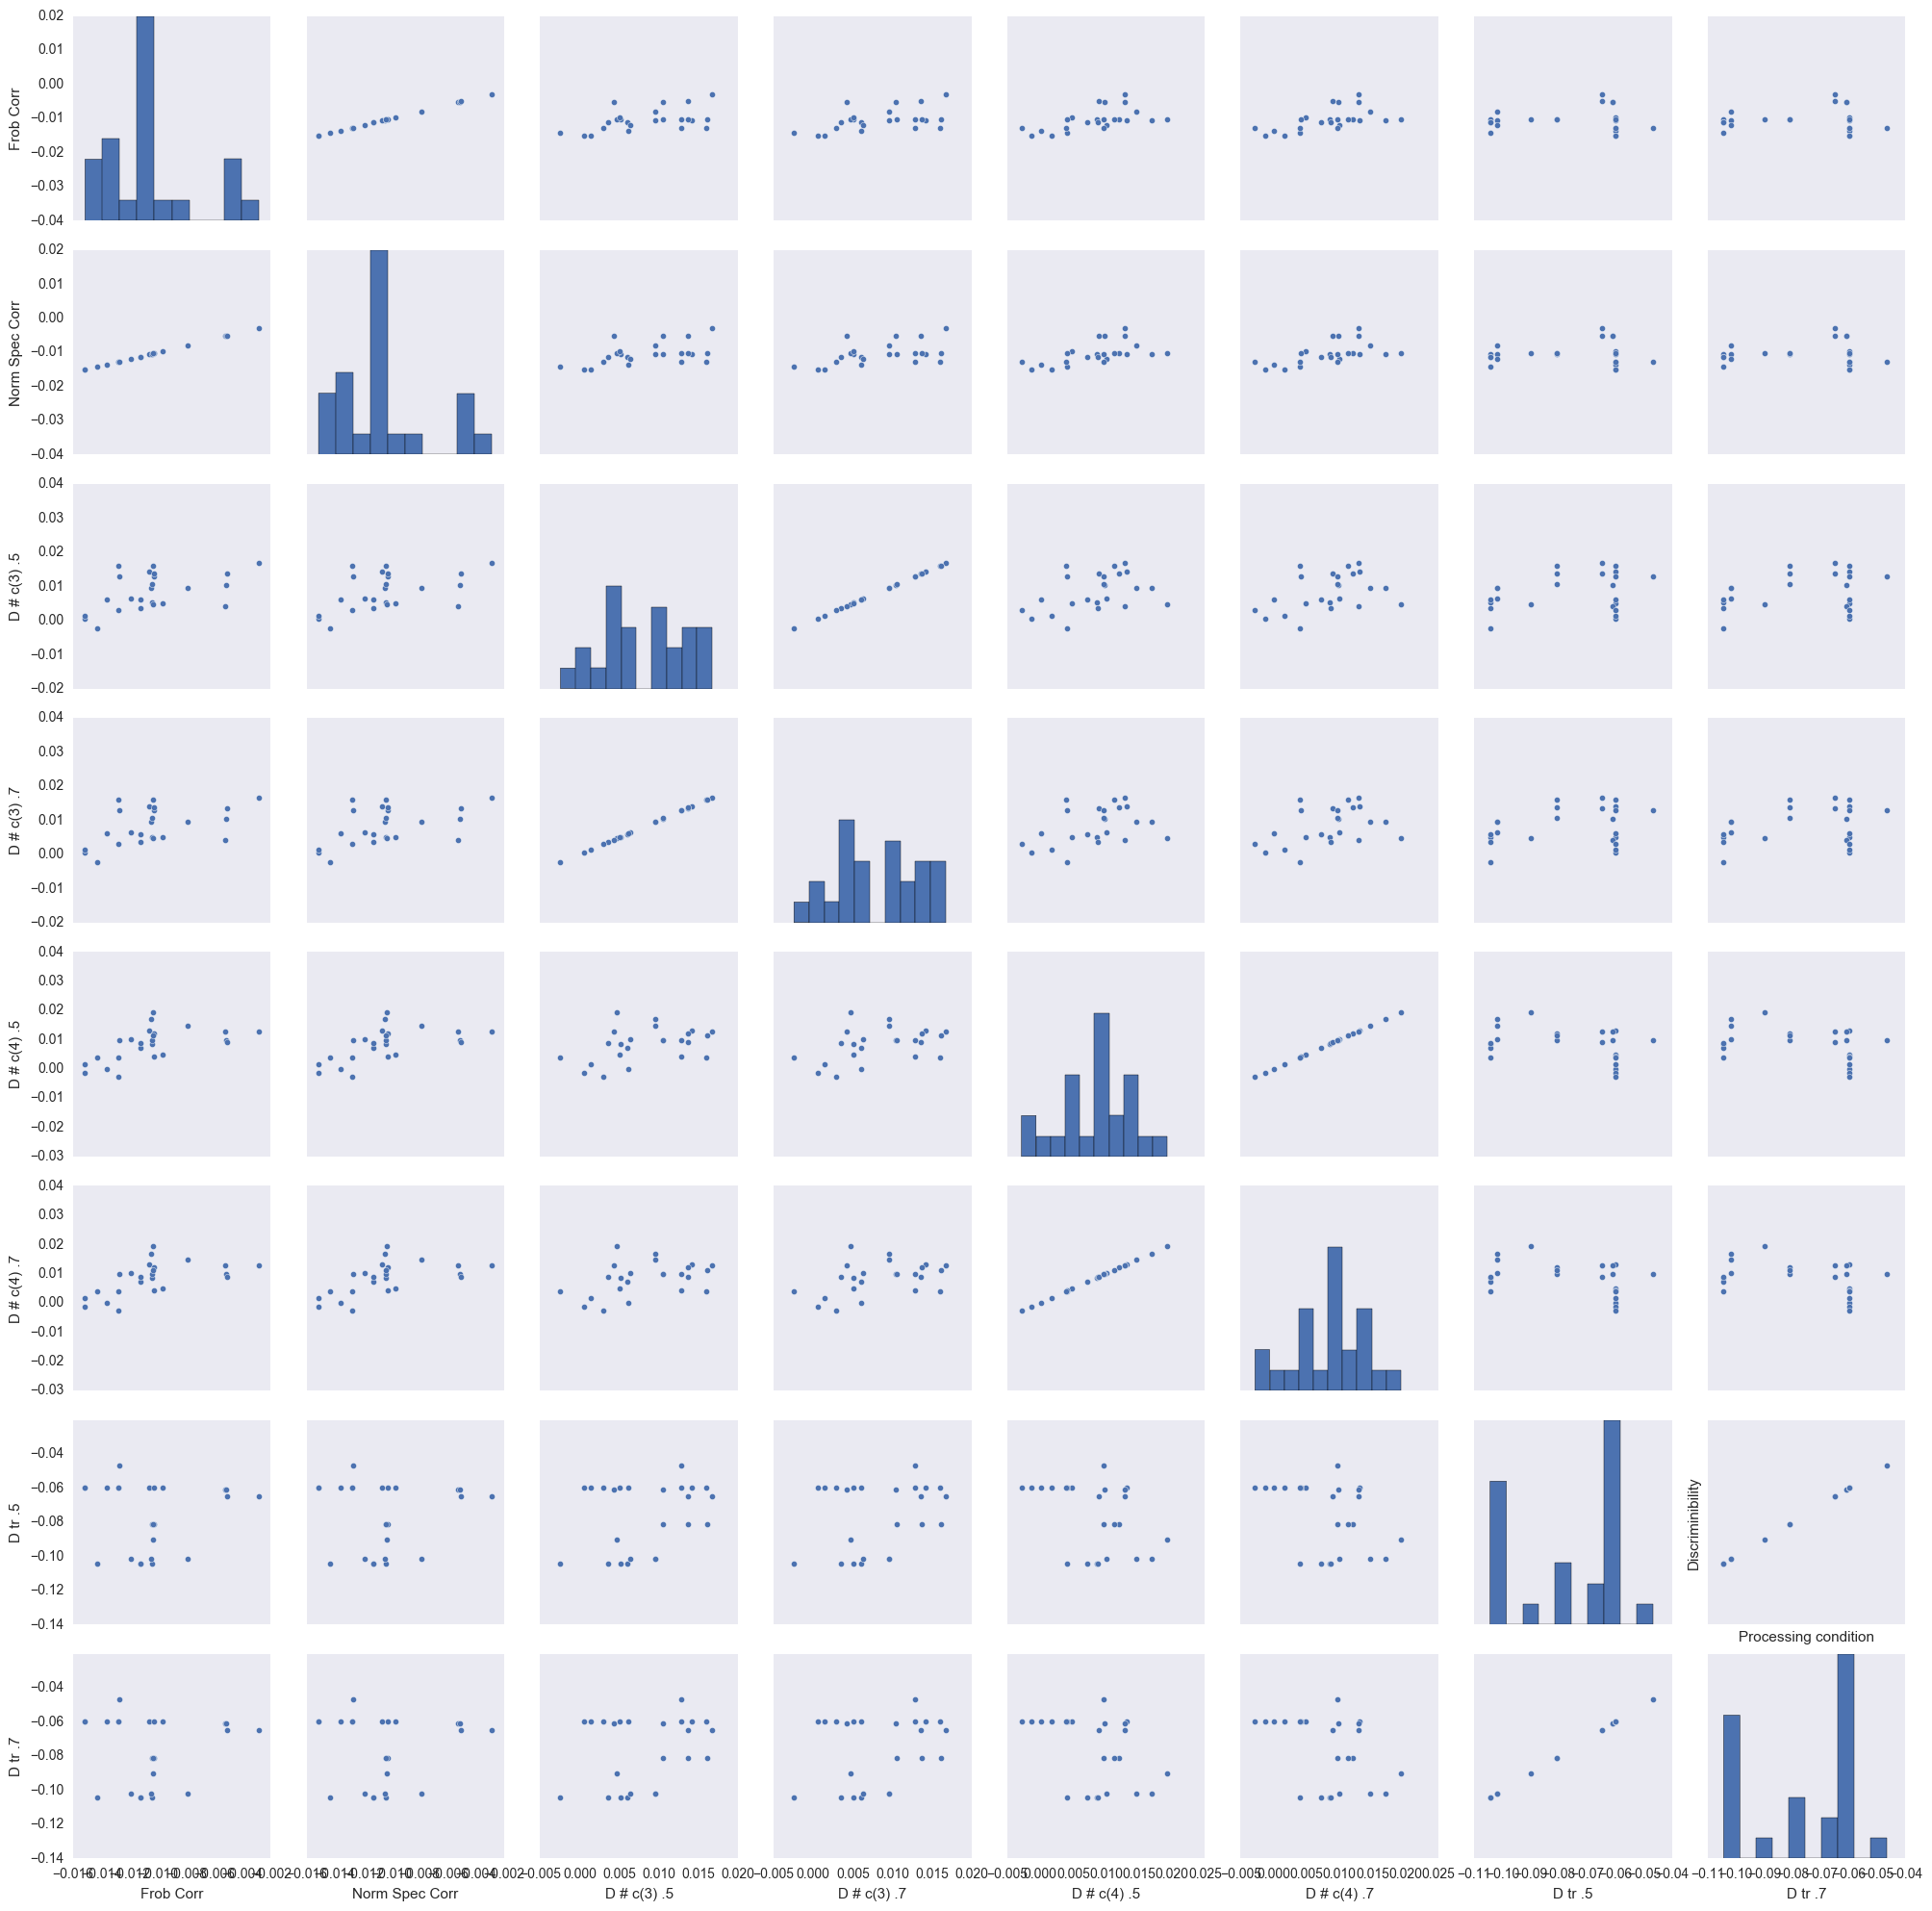

In [7]:
d35_res, d35_labs = zip(*results_d35[0])
no_res, no_labs = zip(*results_no[0])
diff_res = np.array(d35_res) - np.array(no_res)
compare_results(zip(diff_res, no_labs),
                'Effect of corruption (35) on disc.')

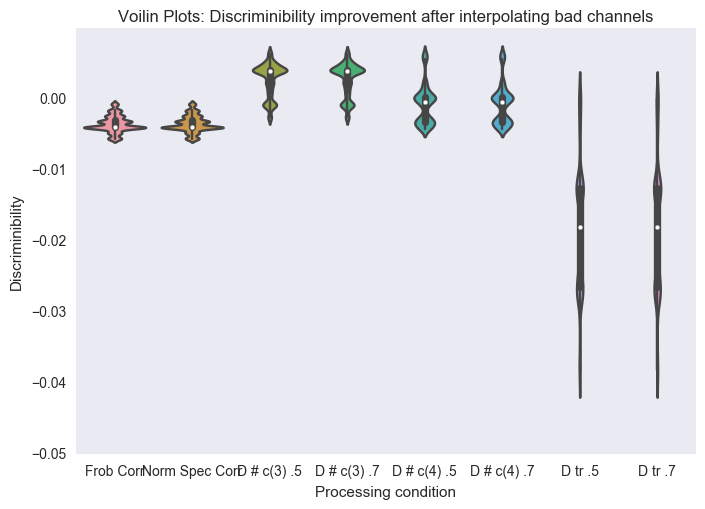

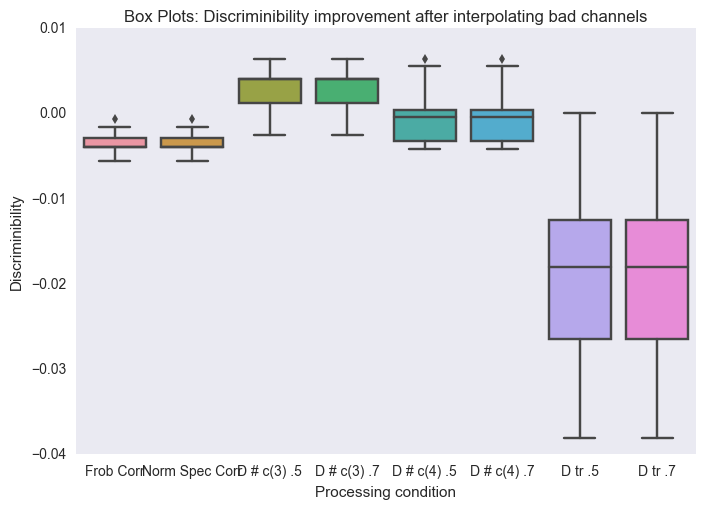

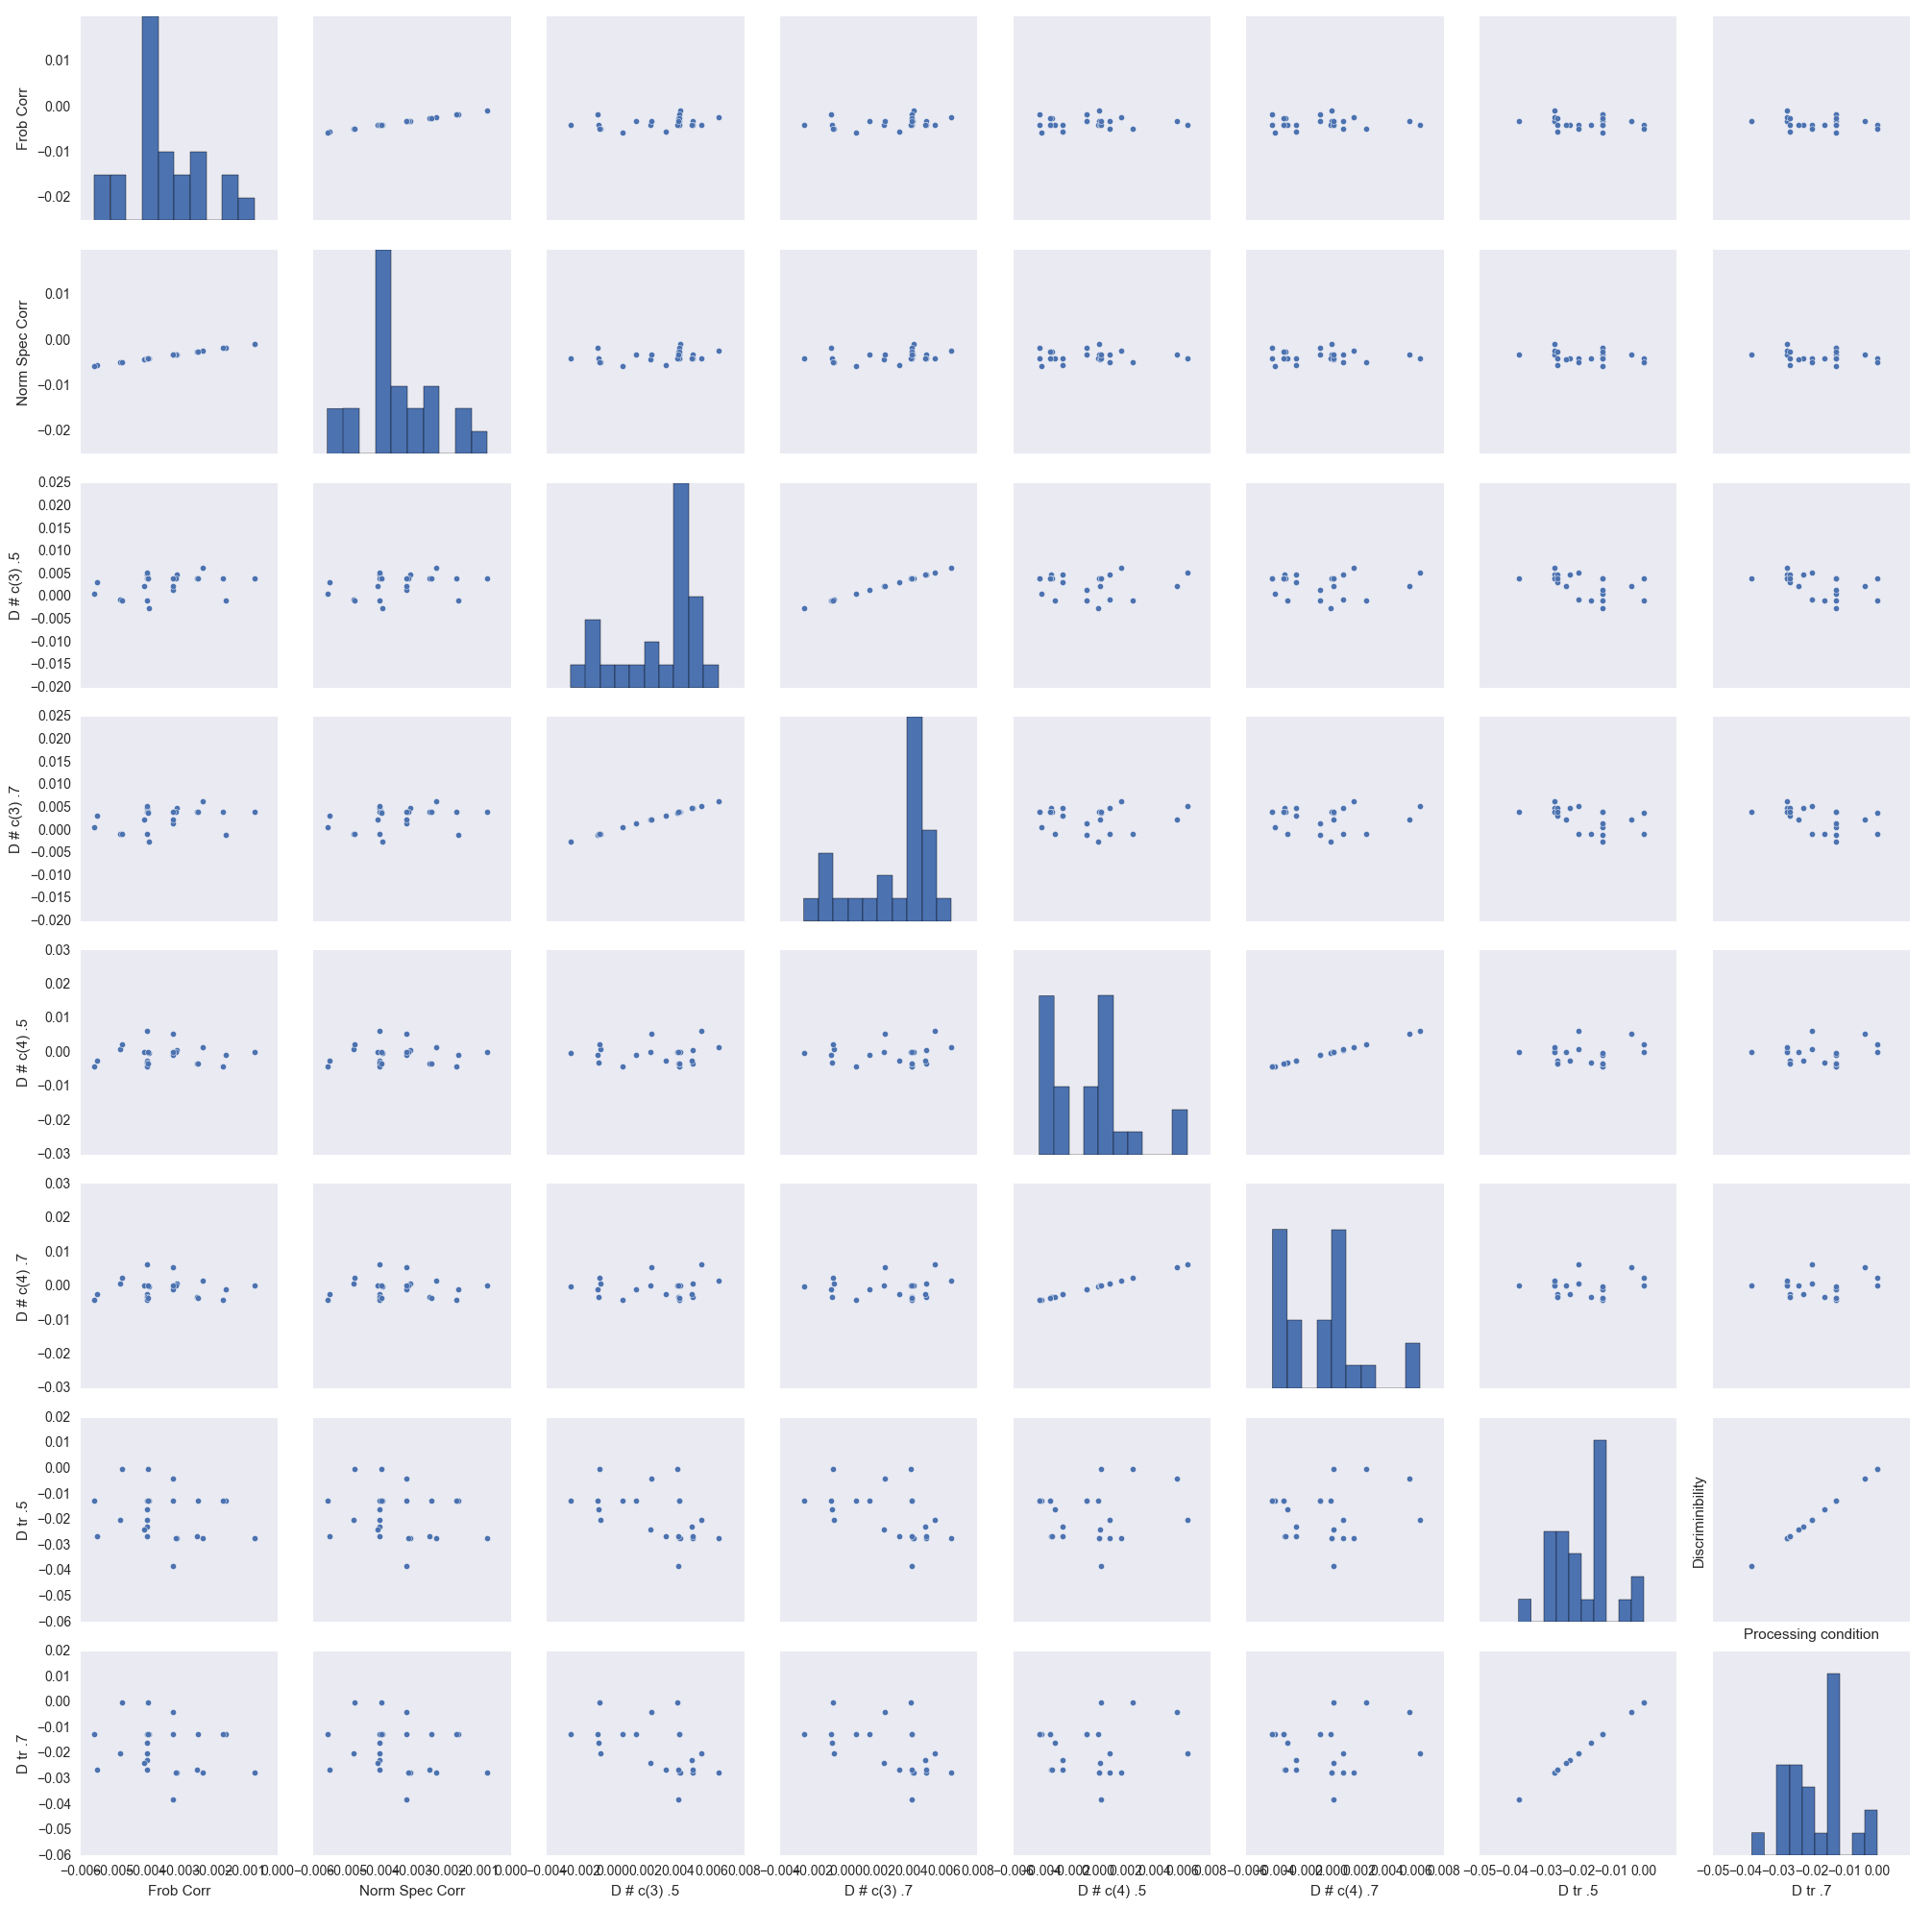

In [10]:
i35_res, i35_labs = zip(*results_i35[0])
d35_res, d35_labs = zip(*results_d35[0])
diff_res = np.array(i35_res) - np.array(d35_res)
compare_results(zip(diff_res, d35_labs),
                'Discriminibility improvement after interpolating bad channels')

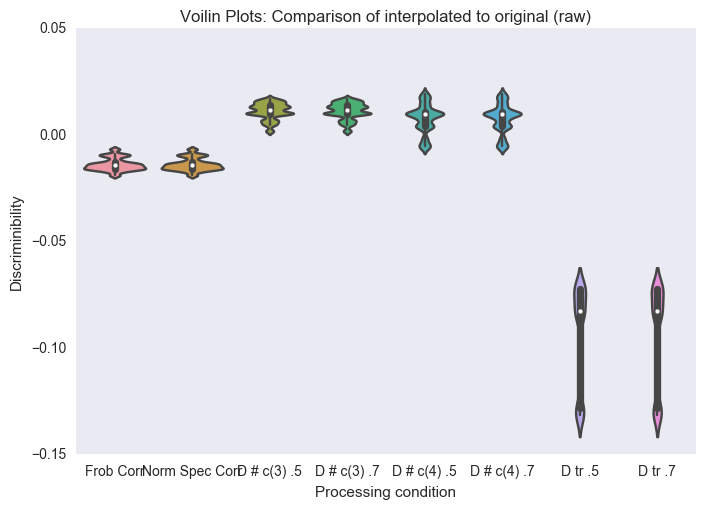

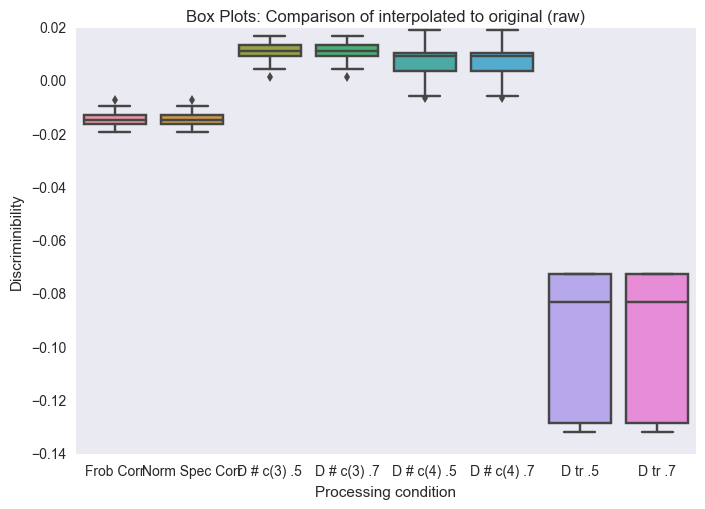

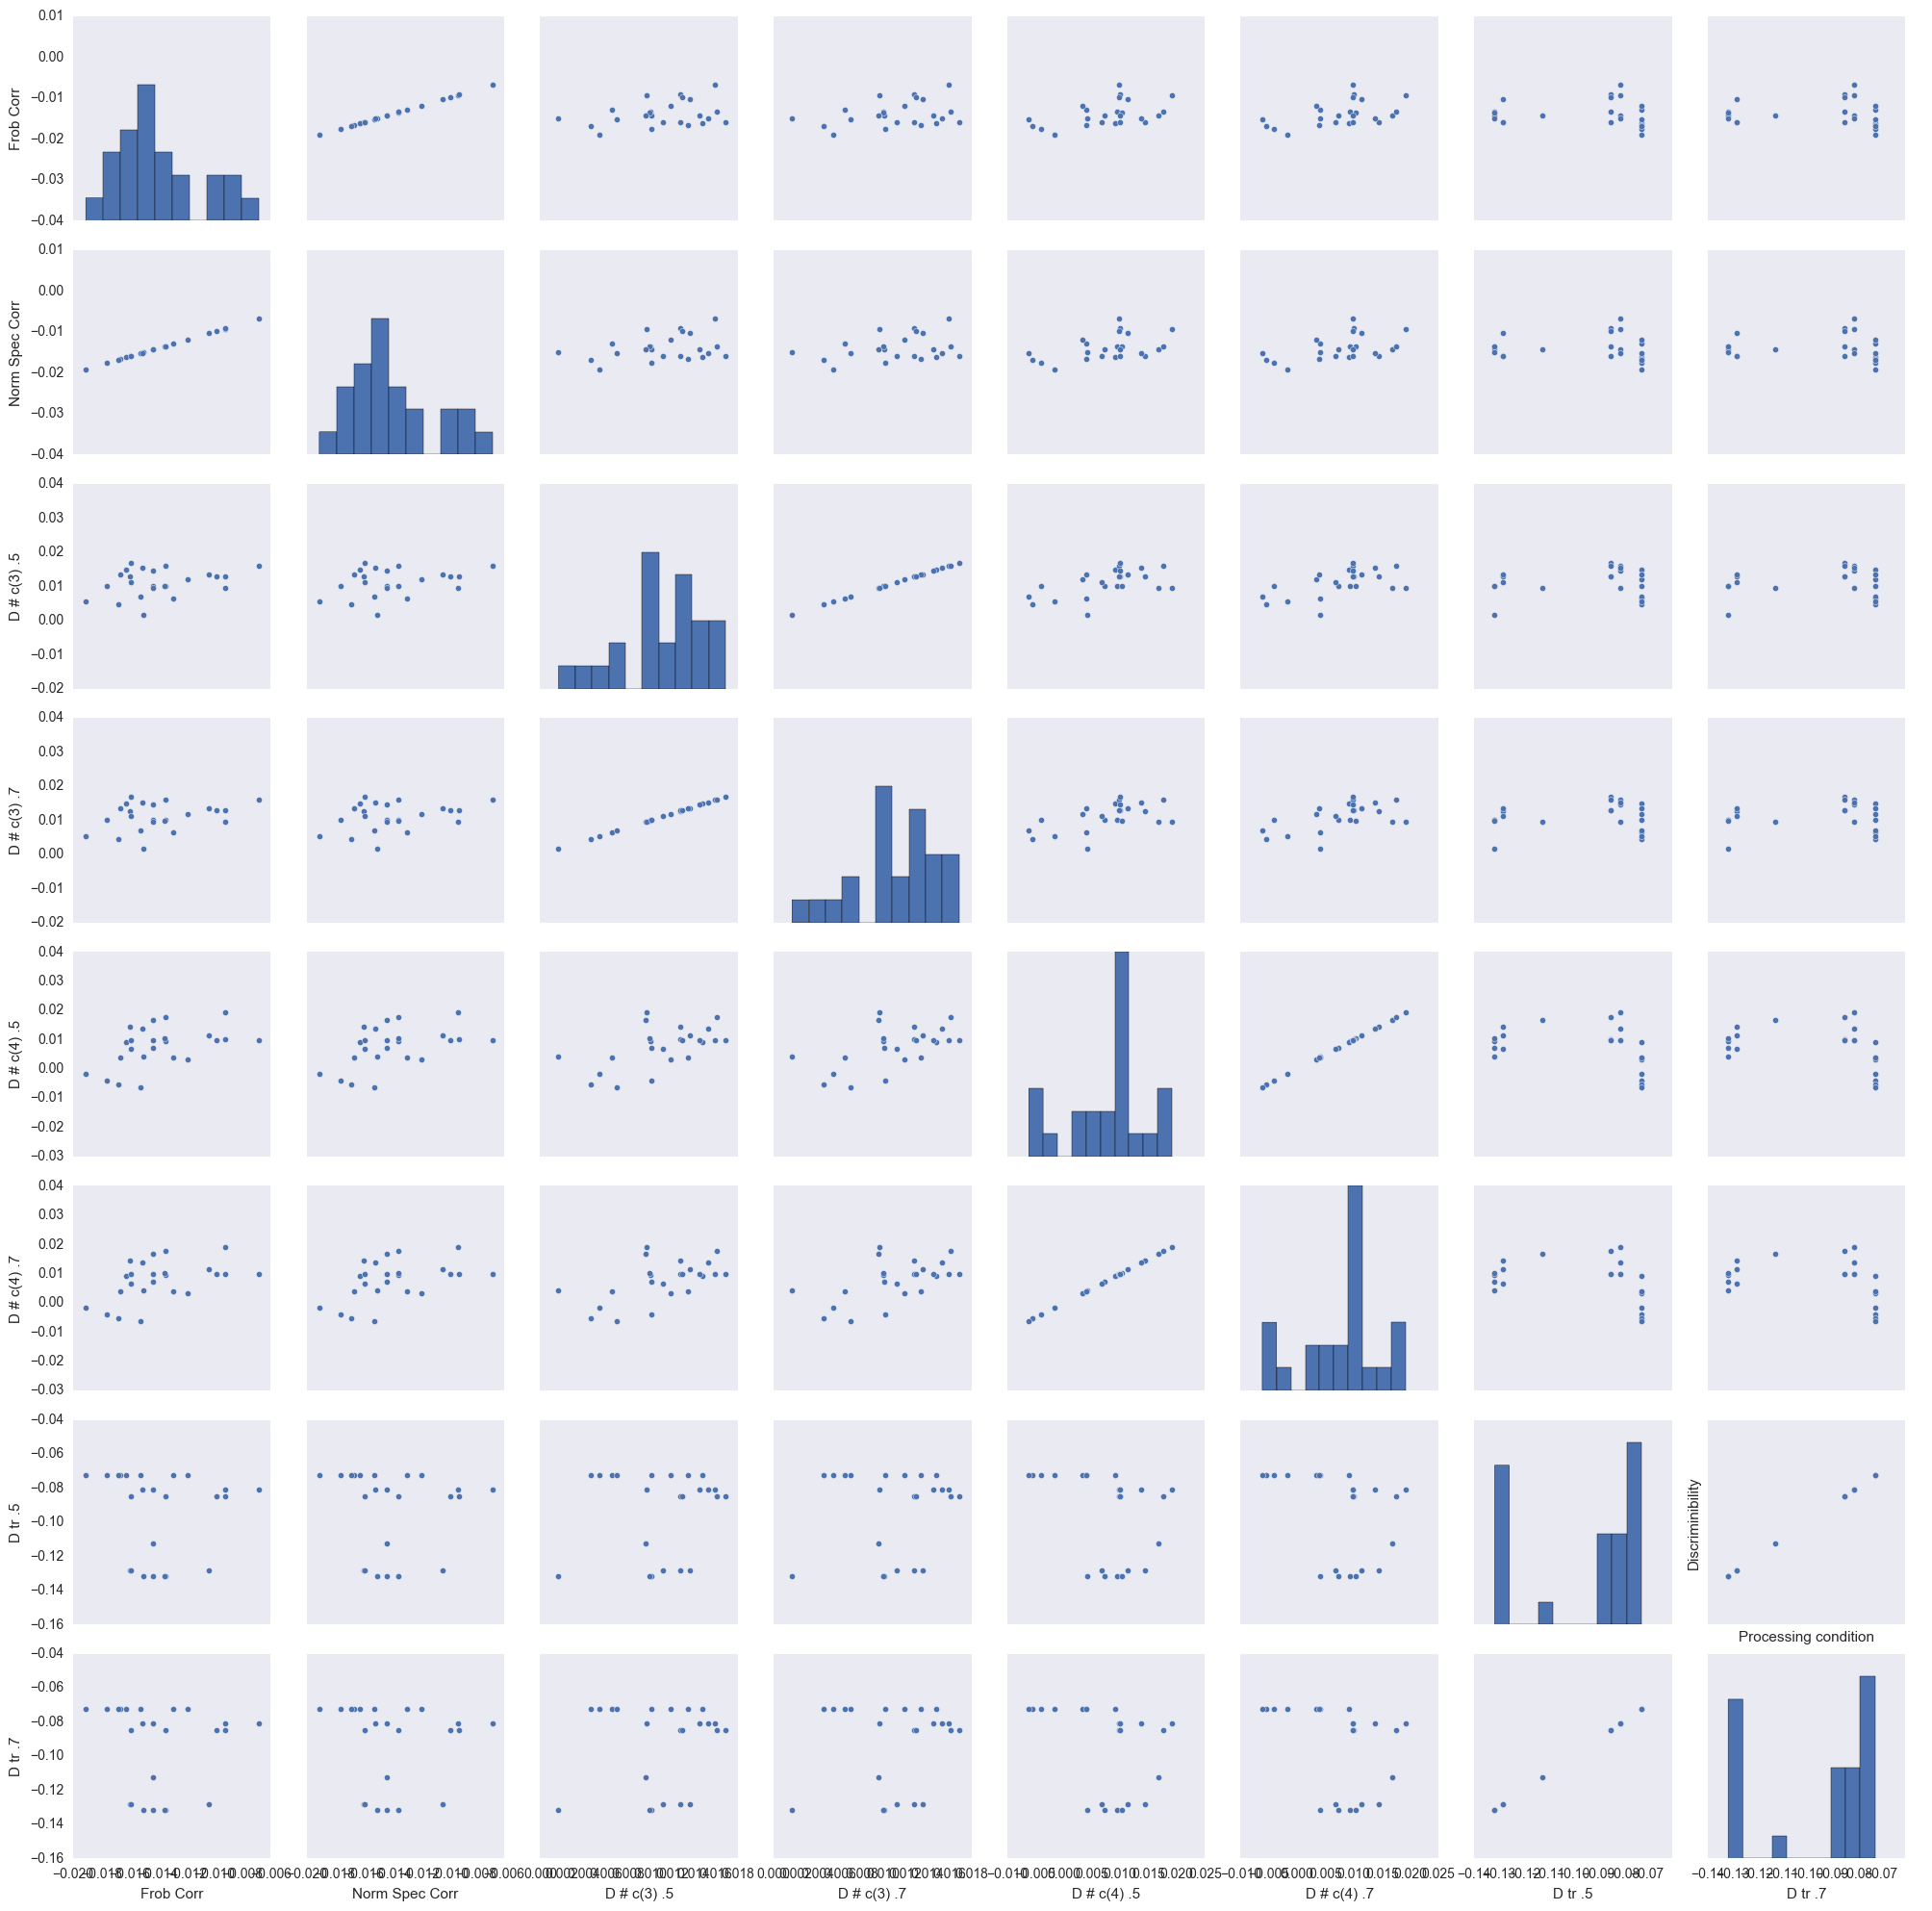

In [11]:
i35_res, i35_labs = zip(*results_i35[0])
diff_res = np.array(i35_res) - np.array(no_res)
compare_results(zip(diff_res, no_labs),
                'Comparison of interpolated to original (raw)')